In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!pip install shapely


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from pyproj import Transformer
import pyproj
from shapely.geometry import Point as point
import geopandas as gpd
import folium
import geopandas
import pysal

In [8]:
dpath = 'C:/Users/yurry/Documents/대학/서울시빅데이터캠퍼스(2023)/호우취약지역입지선정/data/'

In [32]:
seoul20 = geopandas.read_file(dpath + "2020년 서울특별시 침수흔적도/서울시_2020.shp")
seoul20.head()

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,F_YR,GU_NAM,F_SHIM,geometry
0,2018년 8.26~9.1 호우,83.74,143.61,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동258-470,2020,2020,강북구,0.45,"POLYGON ((958787.988 1958336.505, 958803.997 1..."
1,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,2020,강북구,0.45,"POLYGON ((958768.098 1958489.783, 958781.967 1..."
2,2018년 8.26~9.1 호우,36.13,61.62,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동49-142,2020,2020,강북구,0.45,"POLYGON ((958983.095 1957102.275, 958989.841 1..."
3,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,2020,강북구,0.45,"POLYGON ((958913.415 1957059.035, 958902.665 1..."
4,2018년 8.26~9.1 호우,37.70,90.61,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동217-99,2020,2020,강북구,0.45,"POLYGON ((957915.200 1958972.462, 957926.164 1..."


In [33]:
seoul20 = pd.DataFrame(seoul20)
seoul20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   F_DISA_NM  166 non-null    object  
 1   F_AVR_HGT  166 non-null    float64 
 2   F_AREA     166 non-null    float64 
 3   ADM_CD     166 non-null    object  
 4   F_SAT_YMD  166 non-null    object  
 5   F_END_YMD  166 non-null    object  
 6   F_SAT_TM   166 non-null    object  
 7   F_END_TM   166 non-null    object  
 8   F_RSN_DTL  166 non-null    object  
 9   F_ZONE_NM  166 non-null    object  
 10  INV_YR     166 non-null    object  
 11  F_YR       166 non-null    object  
 12  GU_NAM     166 non-null    object  
 13  F_SHIM     166 non-null    float64 
 14  geometry   166 non-null    geometry
dtypes: float64(3), geometry(1), object(11)
memory usage: 19.6+ KB


In [34]:
seoul20.INV_YR.unique()

array(['2020'], dtype=object)

In [35]:
f_dict = {"F_DISA_NM" :'침수재해명',
         "F_AVR_HGT" : '평균침수위',
         "F_AREA" : '침수면적',
         "ADM_CD" : '행정구역코드',
         'F_SAT_YMD' : '침수시작일자',
          'F_END_YMD' : '침수종료일자',
          'F_SAT_TM' : '침수시작시',
          'F_END_TM' : '침수종료시',
          'F_RSN_DTL' : '침수원인코드',
          'F_ZONE_NM' : '침수지구명',
          'INV_YR' : '조사년도',
          'F_YR' : '침수년도',
          'GU_NAM' : '자치구',
          'F_SHIM' : '침수심범위'
         }

In [39]:
f_col = ['침수재해명', '평균침수위', '침수면적', '행정구역코드', '침수시작일자', '침수종료일자', '침수시작시', '침수종료시', '침수원인코드',
         '침수지구명', '조사년도', '침수년도', '자치구', '침수심범위', 'geometry']

In [40]:
seoul20.columns = f_col

In [41]:
seoul20.head(20)

,침수재해명,평균침수위,침수면적,행정구역코드,침수시작일자,침수종료일자,침수시작시,침수종료시,침수원인코드,침수지구명,조사년도,침수년도,자치구,침수심범위,geometry
0,2018년 8.26~9.1 호우,83.74,143.61,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동258-470,2020,2020,강북구,0.45,"POLYGON ((958787.988 1958336.505, 958803.997 1..."
1,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,2020,강북구,0.45,"POLYGON ((958768.098 1958489.783, 958781.967 1..."
2,2018년 8.26~9.1 호우,36.13,61.62,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동49-142,2020,2020,강북구,0.45,"POLYGON ((958983.095 1957102.275, 958989.841 1..."
3,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,2020,강북구,0.45,"POLYGON ((958913.415 1957059.035, 958902.665 1..."
4,2018년 8.26~9.1 호우,37.70,90.61,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동217-99,2020,2020,강북구,0.45,"POLYGON ((957915.200 1958972.462, 957926.164 1..."
5,2018년 8.26~9.1 호우,33.61,61.83,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동162-42,2020,2020,강북구,0.45,"POLYGON ((958063.565 1959412.759, 958064.093 1..."
6,2020년 7.28~8.11 호우,58.39,82.00,1135010500,20200728,20200811,16,22,기타,노원구 상계동68-24,2020,2020,노원구,0.50,"POLYGON ((963183.303 1963425.726, 963173.013 1..."
7,2020년 7.28~8.11 호우,42.33,108.00,1135010200,20200728,20200811,17,23,침수,노원구 월계동산120-5,2020,2020,노원구,0.50,"POLYGON ((960452.385 1958343.769, 960469.713 1..."
8,2020년 7.28~8.11 호우,42.39,96.00,1135010200,20200728,20200811,6,12,침수,노원구 월계동392-58,2020,2020,노원구,0.50,"POLYGON ((960875.435 1958240.589, 960881.674 1..."
9,2020년 7.28~8.11 호우,21.64,99.00,1135010200,20200728,20200811,15,21,침수,노원구 월계동473-12,2020,2020,노원구,0.50,"POLYGON ((961102.526 1957715.271, 961109.697 1..."


In [42]:
F_AREA = seoul20['침수면적']

In [43]:
seoul20['침수재해명'].drop

<bound method Series.drop of 0       2018년 8.26~9.1 호우
1      2020년 7.28~8.11 호우
2       2018년 8.26~9.1 호우
3      2020년 7.28~8.11 호우
4       2018년 8.26~9.1 호우
              ...        
161    2020년 7.28~8.11 호우
162    2020년 7.28~8.11 호우
163    2020년 7.28~8.11 호우
164    2020년 8.22~8.31 호우
165    2020년 7.28~8.11 호우
Name: 침수재해명, Length: 166, dtype: object>

In [44]:
idx=seoul20[seoul20['침수재해명']=='2018년 8.26~9.1 호우'].index
seoul20.drop(idx,inplace=True)

In [45]:
gangwoo = pd.read_excel(dpath + '강우량.xlsx')
gangwoo

,자치구,소계_8월,소계_9월,80mm_8월,80mm_9월
0,강남구,733.333333,293.666667,462.3333,172.8333
1,강동구,613.750000,268.750000,315.5000,170.0000
2,강북구,492.000000,283.000000,220.0000,117.5000
3,강서구,481.750000,197.500000,227.5000,121.5000
4,관악구,722.750000,293.500000,465.7500,150.0000
5,광진구,597.000000,296.500000,313.5000,163.0000
6,구로구,699.000000,223.500000,451.0000,143.0000
7,금천구,694.500000,258.750000,435.7500,141.2500
8,노원구,544.250000,270.250000,266.0000,101.2500
9,도봉구,576.500000,269.500000,377.5000,112.5000


In [46]:
seoul20.head()

,침수재해명,평균침수위,침수면적,행정구역코드,침수시작일자,침수종료일자,침수시작시,침수종료시,침수원인코드,침수지구명,조사년도,침수년도,자치구,침수심범위,geometry
1,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,2020,강북구,0.45,"POLYGON ((958768.098 1958489.783, 958781.967 1..."
3,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,2020,강북구,0.45,"POLYGON ((958913.415 1957059.035, 958902.665 1..."
6,2020년 7.28~8.11 호우,58.39,82.00,1135010500,20200728,20200811,16,22,기타,노원구 상계동68-24,2020,2020,노원구,0.50,"POLYGON ((963183.303 1963425.726, 963173.013 1..."
7,2020년 7.28~8.11 호우,42.33,108.00,1135010200,20200728,20200811,17,23,침수,노원구 월계동산120-5,2020,2020,노원구,0.50,"POLYGON ((960452.385 1958343.769, 960469.713 1..."
8,2020년 7.28~8.11 호우,42.39,96.00,1135010200,20200728,20200811,6,12,침수,노원구 월계동392-58,2020,2020,노원구,0.50,"POLYGON ((960875.435 1958240.589, 960881.674 1..."


In [47]:
seoul20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 1 to 165
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   침수재해명     162 non-null    object  
 1   평균침수위     162 non-null    float64 
 2   침수면적      162 non-null    float64 
 3   행정구역코드    162 non-null    object  
 4   침수시작일자    162 non-null    object  
 5   침수종료일자    162 non-null    object  
 6   침수시작시     162 non-null    object  
 7   침수종료시     162 non-null    object  
 8   침수원인코드    162 non-null    object  
 9   침수지구명     162 non-null    object  
 10  조사년도      162 non-null    object  
 11  침수년도      162 non-null    object  
 12  자치구       162 non-null    object  
 13  침수심범위     162 non-null    float64 
 14  geometry  162 non-null    geometry
dtypes: float64(3), geometry(1), object(11)
memory usage: 20.2+ KB


In [48]:
seoul20['자치구'].unique()

array(['강북구', '노원구', '도봉구', '동대문', '마포구', '서대문', '성북구', '종로구', '강동구',
       '강서구', '동작구', '서초구'], dtype=object)

In [49]:
seoul20['자치구'].unique()[0]

'강북구'

In [60]:
import warnings

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    areadata = pd.read_excel(dpath + '자치구별면적.xlsx', engine="openpyxl")

In [61]:
areadata.iloc[0]

동별(1)          동별(1)
동별(2)          동별(2)
동별(3)          동별(3)
2022          인구 (명)
2022.1        면적 (㎢)
2022.2    인구밀도 (명/㎢)
Name: 0, dtype: object

In [63]:
areadata.columns = areadata.iloc[0]
areadata.head()

,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
0,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
1,합계,소계,소계,9667669.0,605.21,15974.0
2,NaN,종로구,소계,152211.0,23.91,6365.0
3,NaN,NaN,사직동,9355.0,1.23,7606.0
4,NaN,NaN,삼청동,2642.0,1.49,1773.0


In [124]:
total = areadata[areadata['동별(3)']== '소계']
total

,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
1,합계,소계,소계,9667669.0,605.21,15974.0
2,NaN,종로구,소계,152211.0,23.91,6365.0
20,NaN,중구,소계,130785.0,9.96,13131.0
36,NaN,용산구,소계,233284.0,21.87,10668.0
53,NaN,성동구,소계,288234.0,16.82,17136.0
71,NaN,광진구,소계,351252.0,17.06,20586.0
87,NaN,동대문구,소계,353601.0,14.22,24873.0
102,NaN,중랑구,소계,390140.0,18.5,21092.0
119,NaN,성북구,소계,441984.0,24.58,17983.0
140,NaN,강북구,소계,297702.0,23.6,12614.0


In [125]:
total.drop([1], axis=0, inplace = True)

C:\Users\yurry\AppData\Local\Temp\ipykernel_34224\87505866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.drop([1], axis=0, inplace = True)


In [126]:
total.head(10)

,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
2,NaN,종로구,소계,152211.0,23.91,6365.0
20,NaN,중구,소계,130785.0,9.96,13131.0
36,NaN,용산구,소계,233284.0,21.87,10668.0
53,NaN,성동구,소계,288234.0,16.82,17136.0
71,NaN,광진구,소계,351252.0,17.06,20586.0
87,NaN,동대문구,소계,353601.0,14.22,24873.0
102,NaN,중랑구,소계,390140.0,18.5,21092.0
119,NaN,성북구,소계,441984.0,24.58,17983.0
140,NaN,강북구,소계,297702.0,23.6,12614.0
154,NaN,도봉구,소계,313989.0,20.65,15205.0


In [127]:
total.drop(['동별(1)', '동별(3)', '인구 (명)', '인구밀도 (명/㎢)'], axis=1, inplace=True)
total

C:\Users\yurry\AppData\Local\Temp\ipykernel_34224\1649898895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.drop(['동별(1)', '동별(3)', '인구 (명)', '인구밀도 (명/㎢)'], axis=1, inplace=True)


,동별(2),면적 (㎢)
2,종로구,23.91
20,중구,9.96
36,용산구,21.87
53,성동구,16.82
71,광진구,17.06
87,동대문구,14.22
102,중랑구,18.5
119,성북구,24.58
140,강북구,23.6
154,도봉구,20.65


In [128]:
total['면적 (m^2)'] = total['면적 (㎢)']*1000000
total

C:\Users\yurry\AppData\Local\Temp\ipykernel_34224\1640425844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['면적 (m^2)'] = total['면적 (㎢)']*1000000


,동별(2),면적 (㎢),면적 (m^2)
2,종로구,23.91,23910000.0
20,중구,9.96,9960000.0
36,용산구,21.87,21870000.0
53,성동구,16.82,16820000.0
71,광진구,17.06,17060000.0
87,동대문구,14.22,14220000.0
102,중랑구,18.5,18500000.0
119,성북구,24.58,24580000.0
140,강북구,23.6,23600000.0
154,도봉구,20.65,20650000.0


In [129]:
total.index = total['동별(2)']
total

,동별(2),면적 (㎢),면적 (m^2)
동별(2),,,
종로구,종로구,23.91,23910000.0
중구,중구,9.96,9960000.0
용산구,용산구,21.87,21870000.0
성동구,성동구,16.82,16820000.0
광진구,광진구,17.06,17060000.0
동대문구,동대문구,14.22,14220000.0
중랑구,중랑구,18.5,18500000.0
성북구,성북구,24.58,24580000.0
강북구,강북구,23.6,23600000.0


In [130]:
total.drop(['동별(2)', '면적 (㎢)'], axis=1, inplace=True)
total

C:\Users\yurry\AppData\Local\Temp\ipykernel_34224\2306571133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total.drop(['동별(2)', '면적 (㎢)'], axis=1, inplace=True)


,면적 (m^2)
동별(2),
종로구,23910000.0
중구,9960000.0
용산구,21870000.0
성동구,16820000.0
광진구,17060000.0
동대문구,14220000.0
중랑구,18500000.0
성북구,24580000.0
강북구,23600000.0


In [131]:
df = seoul20.copy()
df

,침수재해명,평균침수위,침수면적,행정구역코드,침수시작일자,침수종료일자,침수시작시,침수종료시,침수원인코드,침수지구명,조사년도,침수년도,자치구,침수심범위,geometry
1,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,2020,강북구,0.45,"POLYGON ((958768.098 1958489.783, 958781.967 1..."
3,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,2020,강북구,0.45,"POLYGON ((958913.415 1957059.035, 958902.665 1..."
6,2020년 7.28~8.11 호우,58.39,82.00,1135010500,20200728,20200811,16,22,기타,노원구 상계동68-24,2020,2020,노원구,0.50,"POLYGON ((963183.303 1963425.726, 963173.013 1..."
7,2020년 7.28~8.11 호우,42.33,108.00,1135010200,20200728,20200811,17,23,침수,노원구 월계동산120-5,2020,2020,노원구,0.50,"POLYGON ((960452.385 1958343.769, 960469.713 1..."
8,2020년 7.28~8.11 호우,42.39,96.00,1135010200,20200728,20200811,6,12,침수,노원구 월계동392-58,2020,2020,노원구,0.50,"POLYGON ((960875.435 1958240.589, 960881.674 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2020년 7.28~8.11 호우,25.91,89.00,1159010200,20200728,20200818,8,14,침수(개인하수도역류),동작구 상도동 348-149,2020,2020,동작구,0.50,"POLYGON ((949811.827 1944787.218, 949812.697 1..."
162,2020년 7.28~8.11 호우,32.92,231.00,1159010700,20200728,20200811,10,16,침수(기타),동작구 사당동 229-14,2020,2020,동작구,0.50,"POLYGON ((952917.774 1942919.202, 952923.378 1..."
163,2020년 7.28~8.11 호우,35.51,1300.00,1165010100,20200728,20200805,12,18,침수(기타),서초구 방배동 984-3,2020,2020,서초구,0.30,"POLYGON ((955705.904 1942592.683, 955711.790 1..."
164,2020년 8.22~8.31 호우,14.36,456.00,1165010100,20200822,20200831,19,1,침수,서초구 방배동 2239,2020,2020,서초구,0.50,"POLYGON ((954291.513 1943694.562, 954311.560 1..."


In [133]:
total['자치구'] = total.index
total

C:\Users\yurry\AppData\Local\Temp\ipykernel_34224\932351403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['자치구'] = total.index


,면적 (m^2),자치구
동별(2),,
종로구,23910000.0,종로구
중구,9960000.0,중구
용산구,21870000.0,용산구
성동구,16820000.0,성동구
광진구,17060000.0,광진구
동대문구,14220000.0,동대문구
중랑구,18500000.0,중랑구
성북구,24580000.0,성북구
강북구,23600000.0,강북구


In [135]:
df = pd.merge(seoul20, total, on = '자치구')
df

,침수재해명,평균침수위,침수면적,행정구역코드,침수시작일자,침수종료일자,침수시작시,침수종료시,침수원인코드,침수지구명,조사년도,침수년도,자치구,침수심범위,geometry,면적 (m^2)
0,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,2020,강북구,0.45,"POLYGON ((958768.098 1958489.783, 958781.967 1...",23600000.0
1,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,2020,강북구,0.45,"POLYGON ((958913.415 1957059.035, 958902.665 1...",23600000.0
2,2020년 7.28~8.11 호우,58.39,82.00,1135010500,20200728,20200811,16,22,기타,노원구 상계동68-24,2020,2020,노원구,0.50,"POLYGON ((963183.303 1963425.726, 963173.013 1...",35440000.0
3,2020년 7.28~8.11 호우,42.33,108.00,1135010200,20200728,20200811,17,23,침수,노원구 월계동산120-5,2020,2020,노원구,0.50,"POLYGON ((960452.385 1958343.769, 960469.713 1...",35440000.0
4,2020년 7.28~8.11 호우,42.39,96.00,1135010200,20200728,20200811,6,12,침수,노원구 월계동392-58,2020,2020,노원구,0.50,"POLYGON ((960875.435 1958240.589, 960881.674 1...",35440000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020년 7.28~8.11 호우,25.91,89.00,1159010200,20200728,20200818,8,14,침수(개인하수도역류),동작구 상도동 348-149,2020,2020,동작구,0.50,"POLYGON ((949811.827 1944787.218, 949812.697 1...",16360000.0
146,2020년 7.28~8.11 호우,32.92,231.00,1159010700,20200728,20200811,10,16,침수(기타),동작구 사당동 229-14,2020,2020,동작구,0.50,"POLYGON ((952917.774 1942919.202, 952923.378 1...",16360000.0
147,2020년 7.28~8.11 호우,35.51,1300.00,1165010100,20200728,20200805,12,18,침수(기타),서초구 방배동 984-3,2020,2020,서초구,0.30,"POLYGON ((955705.904 1942592.683, 955711.790 1...",46970000.0
148,2020년 8.22~8.31 호우,14.36,456.00,1165010100,20200822,20200831,19,1,침수,서초구 방배동 2239,2020,2020,서초구,0.50,"POLYGON ((954291.513 1943694.562, 954311.560 1...",46970000.0


In [137]:
df['침수면적비율'] = df['침수면적']/df['면적 (m^2)']
df.head()

,침수재해명,평균침수위,침수면적,행정구역코드,침수시작일자,침수종료일자,침수시작시,침수종료시,침수원인코드,침수지구명,조사년도,침수년도,자치구,침수심범위,geometry,면적 (m^2),침수면적비율
0,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,2020,강북구,0.45,"POLYGON ((958768.098 1958489.783, 958781.967 1...",23600000.0,0.000005
1,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,2020,강북구,0.45,"POLYGON ((958913.415 1957059.035, 958902.665 1...",23600000.0,0.000005
2,2020년 7.28~8.11 호우,58.39,82.00,1135010500,20200728,20200811,16,22,기타,노원구 상계동68-24,2020,2020,노원구,0.50,"POLYGON ((963183.303 1963425.726, 963173.013 1...",35440000.0,0.000002
3,2020년 7.28~8.11 호우,42.33,108.00,1135010200,20200728,20200811,17,23,침수,노원구 월계동산120-5,2020,2020,노원구,0.50,"POLYGON ((960452.385 1958343.769, 960469.713 1...",35440000.0,0.000003
4,2020년 7.28~8.11 호우,42.39,96.00,1135010200,20200728,20200811,6,12,침수,노원구 월계동392-58,2020,2020,노원구,0.50,"POLYGON ((960875.435 1958240.589, 960881.674 1...",35440000.0,0.000003


In [138]:
df['침수면적비율'].unique()

array([5.366525423728814e-06, 4.500423728813559e-06,
       2.3137697516930024e-06, 3.0474040632054176e-06,
       2.708803611738149e-06, 2.793453724604966e-06,
       3.4952031602708803e-06, 1.0158013544018059e-06,
       1.8623024830699774e-06, 1.9187358916478555e-06,
       3.285270880361174e-06, 2.0033860045146727e-06,
       3.188487584650113e-06, 4.796839729119639e-06,
       6.207674943566592e-07, 1.3050225733634312e-06,
       3.968961625282167e-06, 1.8476297968397292e-06,
       3.6963882618510157e-06, 2.614841986455982e-06,
       1.9751693002257336e-06, 1.6647855530474041e-06,
       5.930750605326876e-06, 9.109443099273609e-06,
       1.087312348668281e-05, 0.0001289414043583535,
       1.4138498789346246e-05, 7.338784067085954e-06,
       2.0985324947589096e-06, 1.2893081761006289e-06,
       2.638993710691824e-06, 3.069975589910496e-06,
       2.5866558177379985e-06, 2.0744458385612716e-06,
       8.10121288163948e-06, 2.7645336679213717e-06, 7.33631557543717e-06,
       

C:\Users\yurry\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yurry\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yurry\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yurry\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yurry\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yurry\anaconda3\

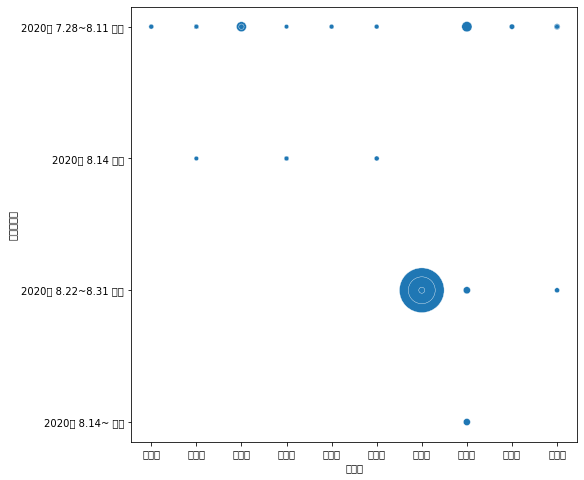

In [143]:
import seaborn as sns

# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [8, 8]

# use the scatterplot function to build the bubble map
sns.scatterplot(data=df, x="자치구", y="침수재해명", size="침수면적비율", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

In [144]:
# 데이터 파일 엑셀로 저장
df.to_excel(excel_writer= dpath + '2020년 자치구 별 침수면적비율.xlsx')